In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [2]:
df = pd.read_csv('NSE-TATAGLOBAL11.csv')

In [3]:
# setting the index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [4]:
new_data

,Close
Date,
2013-10-08,155.8
2013-10-09,155.55
2013-10-10,160.15
2013-10-11,160.05
2013-10-14,159.45
...,...
2018-10-01,230.9
2018-10-03,227.6
2018-10-04,218.2


In [5]:
#creating train and test sets
dataset = new_data.values

In [6]:
dataset

array([[155.8],
       [155.55],
       [160.15],
       ...,
       [218.2],
       [209.2],
       [215.15]], dtype=object)

In [7]:
train = dataset[0:987,:]
valid = dataset[987:,:]

In [8]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.23823398],
       [0.2371134 ],
       [0.25773196],
       ...,
       [0.51792918],
       [0.47758853],
       [0.50425818]])

In [9]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
x_train.shape

(927, 60)

In [13]:
y_train.shape

(927,)

In [14]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [15]:
x_train.shape

(927, 60, 1)

In [16]:
# create and fit the LSTM network
model = Sequential() # 顺序模型，核心操作是添加layer（图层）
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1)) #全连接层

model.compile(loss='mean_squared_error', optimizer='adam') #选择优化器，并指定损失函数
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

927/927 - 17s - loss: 0.0011


In [17]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [18]:
inputs.shape

(308, 1)

In [19]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [21]:
X_test.shape

(248, 60, 1)

In [22]:
closing_price = model.predict(X_test)
closing_price

array([[0.46935248],
       [0.47431025],
       [0.4779763 ],
       [0.48118928],
       [0.48565152],
       [0.48863056],
       [0.48996782],
       [0.49082652],
       [0.48858848],
       [0.4835635 ],
       [0.47682342],
       [0.4752461 ],
       [0.47292182],
       [0.47413403],
       [0.48496863],
       [0.5035525 ],
       [0.5232103 ],
       [0.54115355],
       [0.5543668 ],
       [0.56240654],
       [0.57407546],
       [0.5776144 ],
       [0.5764499 ],
       [0.58575225],
       [0.5946846 ],
       [0.6007323 ],
       [0.61434245],
       [0.6325066 ],
       [0.6507797 ],
       [0.6727413 ],
       [0.70523953],
       [0.7357843 ],
       [0.76130235],
       [0.78079283],
       [0.79735863],
       [0.8084066 ],
       [0.8236791 ],
       [0.83138204],
       [0.8402642 ],
       [0.8447349 ],
       [0.8424643 ],
       [0.83815336],
       [0.8290838 ],
       [0.82705986],
       [0.83209336],
       [0.8480501 ],
       [0.85719466],
       [0.859

In [23]:
closing_price = scaler.inverse_transform(closing_price)
closing_price

array([[207.36253],
       [208.46863],
       [209.28651],
       [210.00333],
       [210.99886],
       [211.66348],
       [211.96182],
       [212.1534 ],
       [211.6541 ],
       [210.53302],
       [209.02931],
       [208.67741],
       [208.15886],
       [208.4293 ],
       [210.84651],
       [214.99255],
       [219.37822],
       [223.38135],
       [226.32924],
       [228.1229 ],
       [230.72623],
       [231.51578],
       [231.25597],
       [233.33133],
       [235.32413],
       [236.67339],
       [239.7098 ],
       [243.76222],
       [247.83896],
       [252.73859],
       [259.98895],
       [266.80347],
       [272.49655],
       [276.84488],
       [280.5407 ],
       [283.0055 ],
       [286.4128 ],
       [288.13132],
       [290.11295],
       [291.11035],
       [290.6038 ],
       [289.642  ],
       [287.6186 ],
       [287.16705],
       [288.29004],
       [291.84998],
       [293.89014],
       [294.33926],
       [293.96405],
       [293.74048],


In [26]:
closing_price.shape

(248, 1)

In [24]:
rmse = np.sqrt(np.mean(np.power((valid - closing_price),2)))
rmse

10.49427833778874

<ipython-input-25-6074d1a5a266>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


<function matplotlib.pyplot.show(close=None, block=None)>

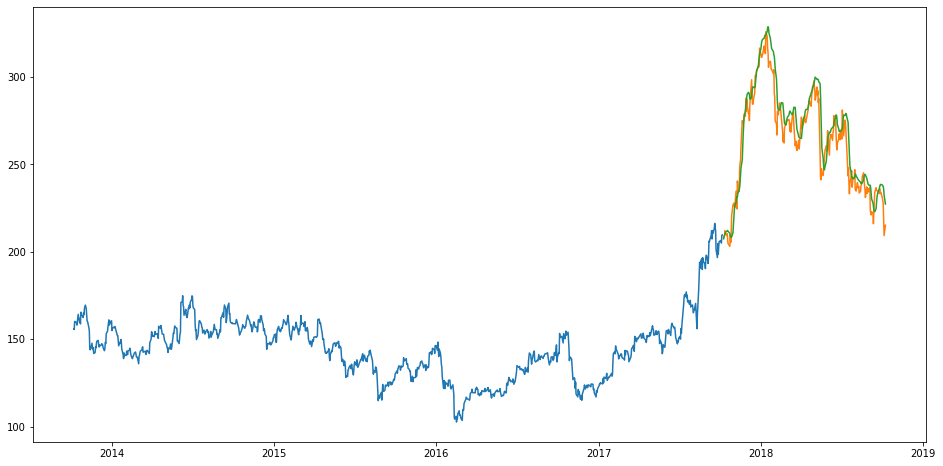

In [25]:
#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price

plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.show